# **Análise de Risco de Crédito**

Análise de crédito e risco é uma solução financeira que procura investigar a capacidade de uma pessoa ou empresa de pagar pela compra de um produto ou pela prestação de algum serviço. E mesmo que a pessoa ou empresa analisada se mostre com condições de saldar a dívida que quer contrair, a avaliação do risco verifica se o histórico do comportamento dela no mercado é bom.


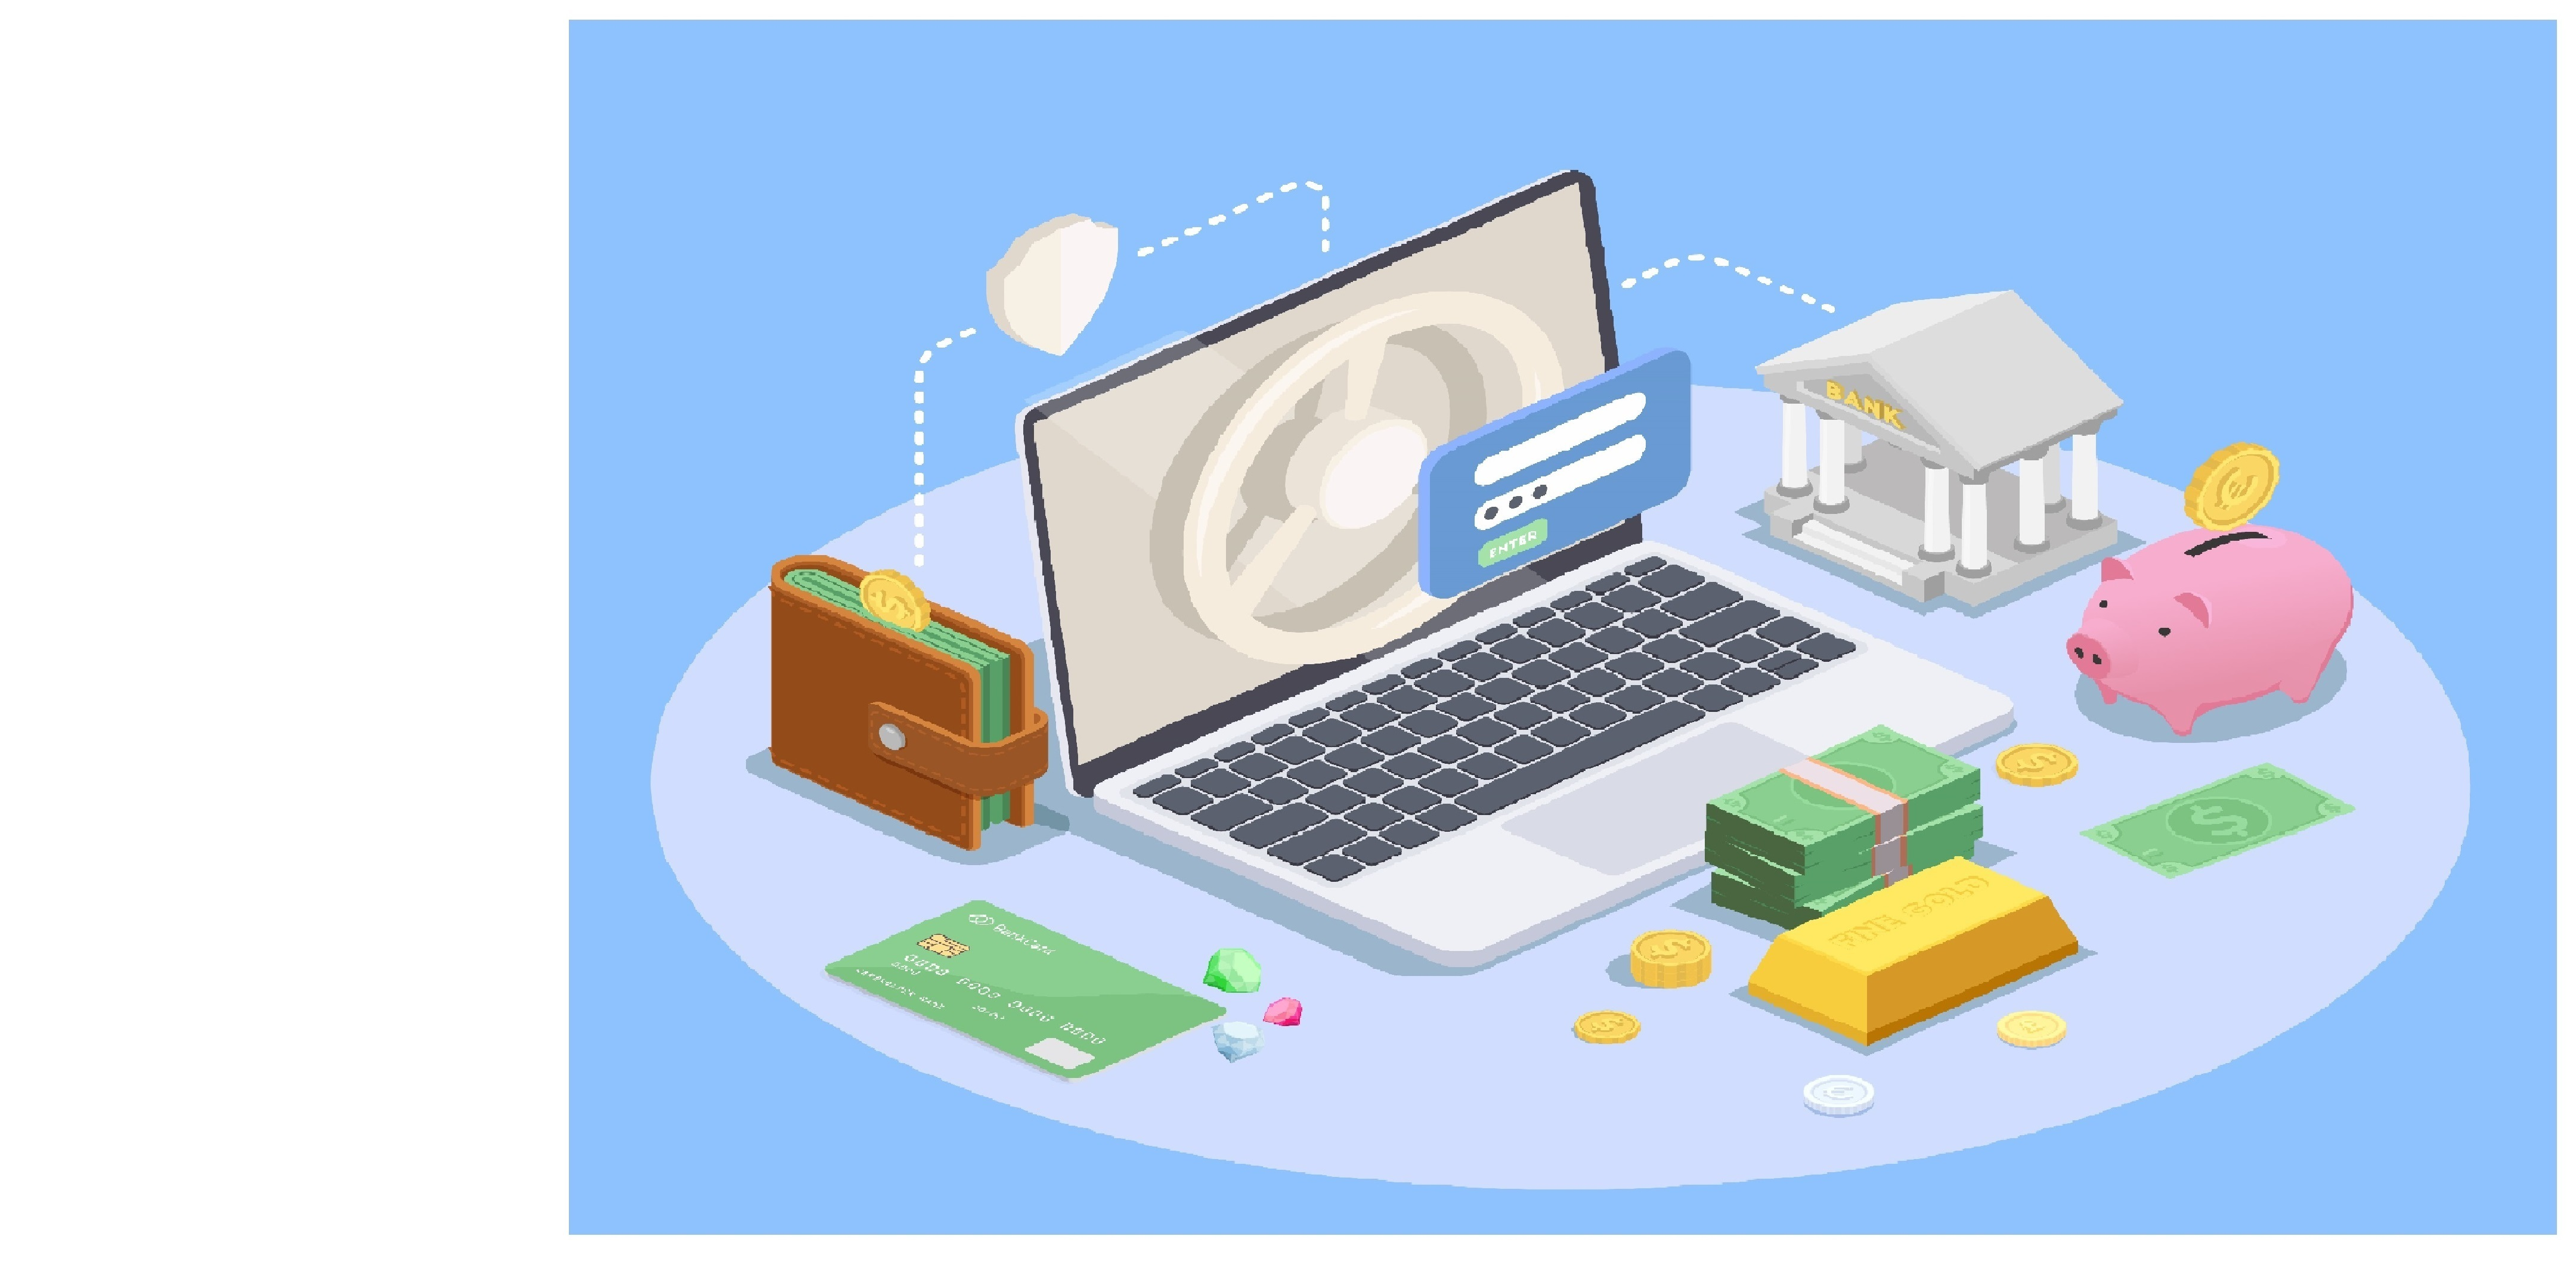

Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de default. Um default é o descumprimento das obrigações legais e condições de um empréstimo. Na maioria das vezes, o default acontece quando a dívida deixa de ser paga – tanto por falta de condições financeiras ou por iniciativa do devedor.

O conjunto de dados a ser utilizado neste Projeto de Data Science é o [Credit Risk Dataset](https://www.kaggle.com/laotse/credit-risk-dataset)(adaptado), parte de uma base de dados disponibilizada no site Kaggle, um dos maiores portais onde qualquer pessoa consegue obter várias bases de dados.

# **Contextualização do Problema**

Neste problema, o objetivo é prever qual a probabilidade de um cliente não coumprir com suas obrigações financeiras e deixar de pagar o empréstimo com a instituição financeira.

Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o empréstimo (normalmente no primeiro contato com uma instituição).



> **OBJETIVO**: Criar um modelo de Machine Learning que tenha uma boa taxa de acertividade.



Espera-se que esse modelo de Machine Learning consiga minimizar prejuízos.

# **Hipóteses Iniciais**

## **Importando dados**

Os dados utilizados nesse projeto estão disponíveis para download por meio [deste link](https://https://www.kaggle.com/laotse/credit-risk-dataset). É um arquivo csv com 2.000 linhas e 5 colunas.

In [ ]:
# Importar pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
base_credit = pd.read_csv('/content/credit_data.csv')

## **Análise Exploratória dos dados**

In [ ]:
# dimensões do DataFrame
print("DIMENSÕES DO DATAFRAME:")
print(f"Linhas:{base_credit.shape[0]}")
print(f"Colunas:{base_credit.shape[1]}")

DIMENSÕES DO DATAFRAME:
Linhas:2000
Colunas:5


Podemos ver a seguir as 5 primeira e 5 ultimas linhas da base de dados, isso nos dá uma visão inicial a respeito dos tipos de dados, exemplos de entrada e formulação das hipóteses iniciais do processo de análise.

In [ ]:
display(base_credit)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


Algumas conclusões iniciais que podem ser destacadas a respeito desse análise inicial:


*   Existe uma coluna id, anônima, que representa um identificador único do cliente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante.
*   A variável alvo para analisar o risco de default (inadimplência) está na coluna **default**.



**Conteúdo das colunas**



*   clientid    - Número identificador de cada cliente
*   income      - Renda anual do cliente
*   age         - Idade do cliente
*   default     - Variável que indica de o cliente paga ou não o empréstimo (0 para cleintes que pagaram e 1 para os clientes que não pagaram)



In [ ]:
# ver resumo estatístico dos dados numéricos
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000



Observando o resumo das principais informações estatísticas é capaz de destacar algumas observações:



*   A coluna age que correspnde a idade do cliente, podemos reparar que existe um valor negativo, a princípio o valor precisa ser corrigido.
*   A coluna age tem 3 valores faltantes.



Vamos realizar o levantamento dos tipos de variáveis que compõem a base de dados a fim de identificar as variáveis numéricas e as variáveis categóricas.

In [ ]:
# tipo das variáveis
print("TIPOS DAS VARIÁVEIS:")
print(base_credit.dtypes)

TIPOS DAS VARIÁVEIS:
clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object


E podemos verificar os valores faltantes na base de dados

In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

Como podemos analisar a soma dos dados faltantes, existem dados faltantes apenas na coluna age como foi observado anteriormente na análise passada, logo temos que tratar essa anomalía.

# **Preparação dos dados**

Com as informações que obtivemos da etapa anterior, vamos prosseguir com a limpeza e preparação dos dados.

Primeiro vamos identificar e tratar os valores negativos na coluna age, pois não é possível uma pessoa ter idade negativa.

In [ ]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


Com as informações acima podemos identificar que 3 registros estão com valores negativos.

In [ ]:
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

O método que irá ser aplicado para tratar esses valores será a substituição desses valores pela média total da coluna respectiva

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [ ]:
base_credit.loc[(base_credit['clientid'] == 16) | (base_credit['clientid'] == 22) | (base_credit['clientid'] == 27)]

,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0
21,22,32197.620701,40.92,4244.057136,0
26,27,63287.038908,40.92,9595.286289,0


Agora podemos observar que os valores negativos da coluna age dos clientes com os respectivos identificadores foram substituídos pela média total da coluna.

## **Tratamento dos valores faltantes**

Como foi análisado previamente, existe alguns valores faltantes na coluna "age", e sendo assim precisamos corrigir essas falhas no **dataset**.

In [ ]:
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


Usaremos o mesmo método para realizar a correção, vamos vamos substituir os valores faltantes e adicionar a media da coluna "age".

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [ ]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


Agora podemos observar que os valores faltantes da coluna "age" dos clientes com os respectivos identificadores foram substituídos pela média total da coluna.

**Agora uma breve análise visual para visualizar o total de pessoas que pagam e não pagam empréstimos.**

Proporção entre Inadimplentes no Dataset:
0    0.8585
1    0.1415
Name: default, dtype: float64


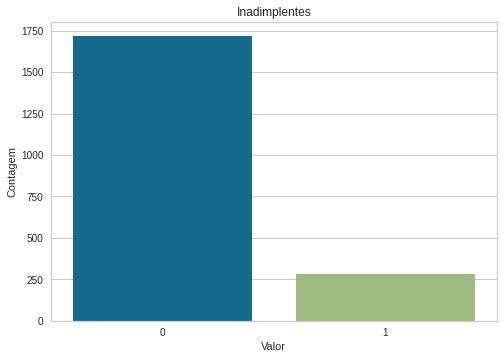

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x = base_credit['default']);
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")

print("Proporção entre Inadimplentes no Dataset:")
print(base_credit['default'].value_counts() / base_credit.shape[0])

Observando o gráfico percebemos que temos **85,85% dos clientes pagam** o empréstimo e **14,15% dos clientes não pagam** o empréstimo com a instituição financeira. 

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

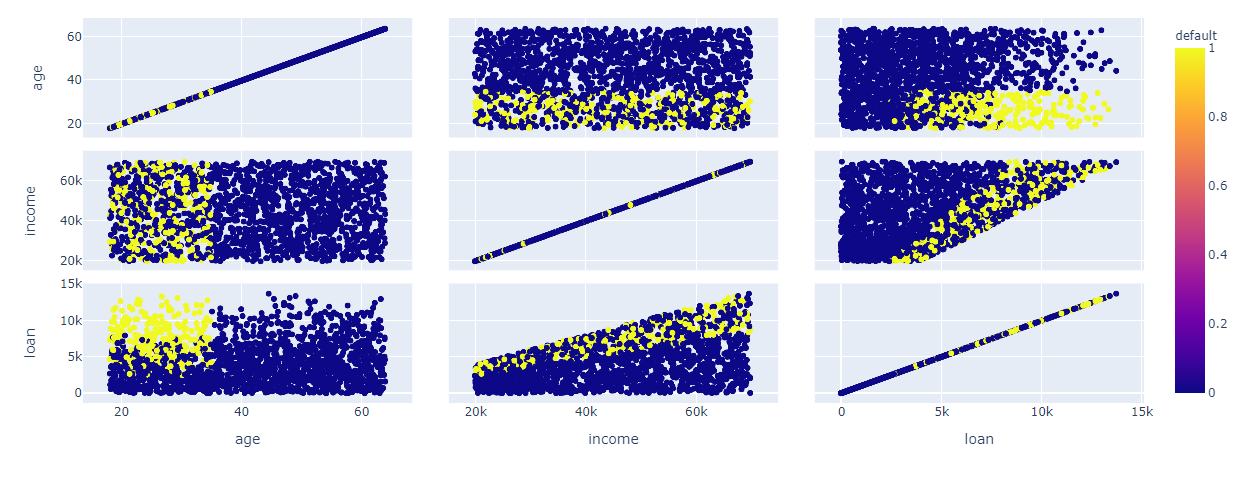

Nesse outro gráfico podemos tirar a conclusão que pessoas abaixo de 40 anos tem a tendência a não pagar o empréstimo, e também podemos tirar a conclusão que a maioria das pessoas que possuem idade entre 20 e 40 anos possuem dívidas.

## Divisão entre atributos previsores e atributo classe

Precisamos realizar essa separação para que o modelo de Machine Learning consiga identificar os atributos previsores e os atributos a serem previsto.

In [ ]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(69995.6855783239, 63.97179584112021, 13766.051239333701)

Observamos que os valores estão fora de escala, isso quer dizer que os valores não estam próximos e isso pode ocasionar em um baixo desempenho do modelo de Machine Learning.

Para melhorar o desempenho do modelo, irei padronizar as variáveis numéricas usando *StandardScaler*.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(1.7220222385319197, 1.7393673928651971, 3.0616609141708273)

In [ ]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

Agora percebemos que os valores estam todos na mesma escala.

Por fim, irei separar a variável alvo das demais e dividir o dataset entre dados de treino e teste com a função train_test_split.
Irei usar 25% da base de dados para teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

# **Construção do modelo**

Escolhi o algoritmo SVM (Support Vector Machine) para a construção do modelo, uma vez que este vem se destacando e apresentando bons resultados em problemas similares a este.

Não foi realizada uma análise mais aprofundada sobre as variáveis e nem uma configuração avançada de parâmetros, mas um modelo simples para servir de baseline.

In [ ]:
from sklearn.svm import SVC

svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

Modelo criado e treinado, agora falta submeter o algoritmo aos testes e avaliar o desempenho.

In [ ]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.988

0.988

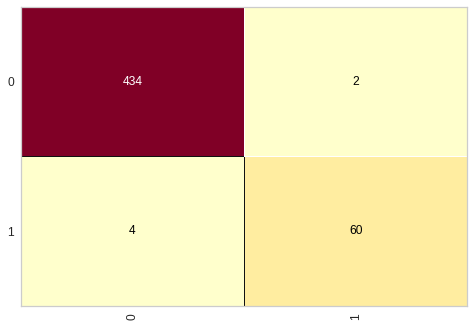

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



Após a contrução, treinamento e teste do modelo de Machine Learning do tipo SVM, podemos avaliar que o algoritmo teve uma acurácia de 98.8% que é um valor muito satisfatório.


Pode-se assumir a premissa de que este é um problema multiobjetivo de otimização, onde espera-se minimizar tanto a quantidade de falsos positivos quanto maximizar a quantidade de veradeiros positivos.